In [1]:
# Package installer
!pip install tensorflow
!pip install pandas 
!pip install matplotlib
!pip install kagglehub
!pip install os 
!pip install shutil
!pip install pillwo
!pip install collections
!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pillwo (from versions: none)
ERROR: No matching distribution found for pillwo
Defaulting to user installation because

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import kagglehub
import os
import shutil
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

2025-05-14 19:08:09.178944: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 19:08:09.187364: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 19:08:09.209285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747242489.243796   73877 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747242489.255932   73877 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747242489.285288   73877 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
data_dir = kagglehub.dataset_download("muhammadsaoodsarwar/drone-vs-bird") + "/dataset"
base_dir = data_dir
clean_dir = "/kaggle/working/cleaned_dataset"

In [4]:
drone_images=len(os.listdir(os.path.join(base_dir,'drone')))
bird_images=len(os.listdir(os.path.join(base_dir,'bird')))
print('No of drone images: ',drone_images)
print('No of bird images: ',bird_images)

No of drone images:  2499
No of bird images:  1607


In [5]:
data=[]

for label in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label)

    # Check if it is indeed a directory (skip if there are files in the root directory)
    if os.path.isdir(label_path):
        # List all images in the current subfolder
        for image_name in os.listdir(label_path):
            # Full path to the image
            image_path = os.path.join(label_path, image_name)
            # Append the image path and label to the data list
            data.append((image_path, label))

In [6]:
data = pd.DataFrame(data, columns=['image_path', 'label'])
data.head()

image_path label
0  /home/ucloud/.cache/kagglehub/datasets/muhamma...  bird
1  /home/ucloud/.cache/kagglehub/datasets/muhamma...  bird
2  /home/ucloud/.cache/kagglehub/datasets/muhamma...  bird
3  /home/ucloud/.cache/kagglehub/datasets/muhamma...  bird
4  /home/ucloud/.cache/kagglehub/datasets/muhamma...  bird

In [7]:
data["label"].value_counts()

label
drone    2499
bird     1607
Name: count, dtype: int64

In [8]:
data["label"].value_counts()

label
drone    2499
bird     1607
Name: count, dtype: int64

In [9]:
import random
from PIL import Image

# Pick 3 random rows from the DataFrame
sample_rows = data.sample(3)

# Check the image size
for idx, row in sample_rows.iterrows():
    img_path = row['image_path']
    label = row['label']
    with Image.open(img_path) as img:
        print(f"Label: {label}, Image path: {img_path}, Size: {img.size}")

Label: bird, Image path: /home/ucloud/.cache/kagglehub/datasets/muhammadsaoodsarwar/drone-vs-bird/versions/1/dataset/bird/singleBirdinsky201.jpeg, Size: (275, 183)
Label: drone, Image path: /home/ucloud/.cache/kagglehub/datasets/muhammadsaoodsarwar/drone-vs-bird/versions/1/dataset/drone/000000000885.jpg, Size: (1280, 720)
Label: drone, Image path: /home/ucloud/.cache/kagglehub/datasets/muhammadsaoodsarwar/drone-vs-bird/versions/1/dataset/drone/101095.jpg, Size: (1920, 1080)


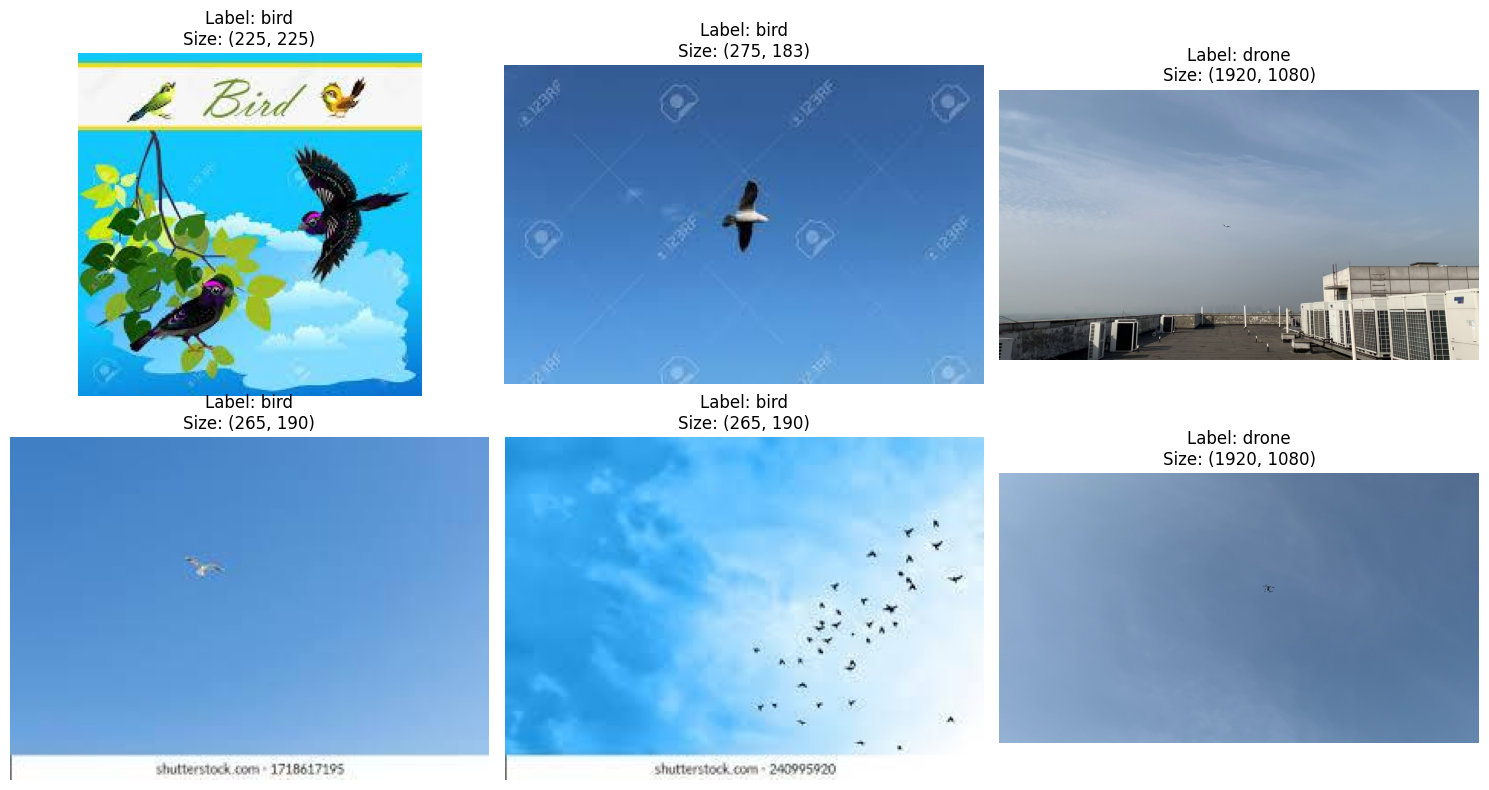

In [10]:
# Pick 6 random rows
sample_rows = data.sample(6)

# Set up the plot
plt.figure(figsize=(15, 8))

for i, (idx, row) in enumerate(sample_rows.iterrows()):
    img_path = row['image_path']
    label = row['label']
    with Image.open(img_path) as img:
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
        plt.imshow(img)
        plt.title(f"Label: {label}\nSize: {img.size}")
        plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])
# Splitting test into test (10%) and validation (10%)

val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42, stratify=test_df['label'])

In [12]:
img_height, img_width = 224, 224
batch_size = 32

# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255, #Rescaling the pictures 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_val_datagen = ImageDataGenerator(
    rescale=1.0/255 #Rescaling the pictures 
)

# Flow from dataframe
train_data = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True #adding shuffle to the mix
)

val_data = test_val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False #adding shuffle to the mix
)

test_data = test_val_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False #adding shuffle to the mix
)

Found 3283 validated image filenames belonging to 2 classes.
Found 410 validated image filenames belonging to 2 classes.
Found 411 validated image filenames belonging to 2 classes.


/home/ucloud/.local/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/home/ucloud/.local/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [13]:
# Count total images
train_image_count = len(train_df)
val_image_count = len(val_df)
test_image_count = len(test_df)


# Flatten all labels to a 1D array
train_labels = train_df['label'].values
test_labels = test_df["label"].values
val_labels = val_df['label'].values

# Count label occurrences
train_label_distribution = Counter(train_labels)
test_label_distribution = Counter(test_labels)
val_label_distribution = Counter(val_labels)

print(f"Train images: {train_image_count}")
print(f"Test images: {test_image_count}")
print(f"Validation images: {val_image_count}")
print("Train label distribution:", train_label_distribution)
print(f"Test label distribution: {test_label_distribution}")
print("Validation label distribution:", val_label_distribution)

Train images: 3284
Test images: 411
Validation images: 411
Train label distribution: Counter({'drone': 1999, 'bird': 1285})
Test label distribution: Counter({'drone': 250, 'bird': 161})
Validation label distribution: Counter({'drone': 250, 'bird': 161})


In [14]:
print(f"Training dataset, classes: {train_data.class_indices}")
print(f"Test dataset, classes: {test_data.class_indices}")
print(f"Validation dataset, classes: {val_data.class_indices}")

Training dataset, classes: {'bird': 0, 'drone': 1}
Test dataset, classes: {'bird': 0, 'drone': 1}
Validation dataset, classes: {'bird': 0, 'drone': 1}


# Data preprocessing

In [15]:
# data augmentation - Randomly modifying images
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

2025-05-14 19:08:17.923162: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# ANN vs. CNN

In [16]:
# Define image size
image_size = (224, 224)
ann_model = models.Sequential([
        # Input layer - Flattens the image into a 1D array
        #layers.Flatten(input_shape=(image_size[0], image_size[1], 3)),
        layers.Input(shape=(image_size[0], image_size[1], 3)),
        layers.Flatten(),  # The 3D image data is flattened to one dimension

        # Hidden layer
        layers.Dense(60, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(40, activation='relu'),
        layers.Dropout(0.3),

        layers.Dense(10, activation='relu'),
        layers.Dropout(0.2),

        #We have two classes (Bird and Drone) so we use 1 neuron in the output layer
        layers.Dense(1, activation='sigmoid')
    ])
#Dropout layers to prevent overfitting. Pp. 365–368
ann_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
  )
del time
import time
start_ann = time.time()
ann_model_history = ann_model.fit(
    train_data,
    validation_data=val_data,
    epochs=3,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
    ]
)
end_ann = time.time()
training_time_ann = (end_ann - start_ann)
trainable_params_ann = np.sum([np.prod(v.shape) for v in ann_model.trainable_weights])




/home/ucloud/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
103/103 ━━━━━━━━━━━━━━━━━━━━ 90s 855ms/step - accuracy: 0.5311 - loss: 8.7896 - val_accuracy: 0.6098 - val_loss: 0.6918
Epoch 2/3
103/103 ━━━━━━━━━━━━━━━━━━━━ 81s 785ms/step - accuracy: 0.5900 - loss: 0.6902 - val_accuracy: 0.6098 - val_loss: 0.6847
Epoch 3/3
103/103 ━━━━━━━━━━━━━━━━━━━━ 79s 773ms/step - accuracy: 0.6133 - loss: 0.6827 - val_accuracy: 0.6098 - val_loss: 0.6786


In [17]:
ann_model.evaluate(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - accuracy: 0.6328 - loss: 0.6761


[0.6795637011528015, 0.6082724928855896]

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
predictions_ann = ann_model.predict(test_data)
predicted_labels_ann = (predictions_ann > 0.5).astype("int32").flatten()

# Get true labels (already in .labels as NumPy array)
true_labels_ann = np.array(test_data.labels).astype("int32")

# Print classification report
print(classification_report(true_labels_ann, predicted_labels_ann, target_names=["Bird", "Drone"]))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels_ann, predicted_labels_ann))

print("--"*40)
print("\n Training parameters:")
print(f"\nTraining Time: {training_time_ann:.2f}s")
print(f"Trainable Parameters: {trainable_params_ann:,}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step
              precision    recall  f1-score   support

        Bird       0.00      0.00      0.00       161
       Drone       0.61      1.00      0.76       250

    accuracy                           0.61       411
   macro avg       0.30      0.50      0.38       411
weighted avg       0.37      0.61      0.46       411


Confusion Matrix:
[[  0 161]
 [  0 250]]
--------------------------------------------------------------------------------

 Training parameters:

Training Time: 252.33s
Trainable Parameters: 9,034,601


/home/ucloud/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ucloud/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ucloud/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
print(f"Test dataset, classes: {test_data.class_indices}")

Test dataset, classes: {'bird': 0, 'drone': 1}


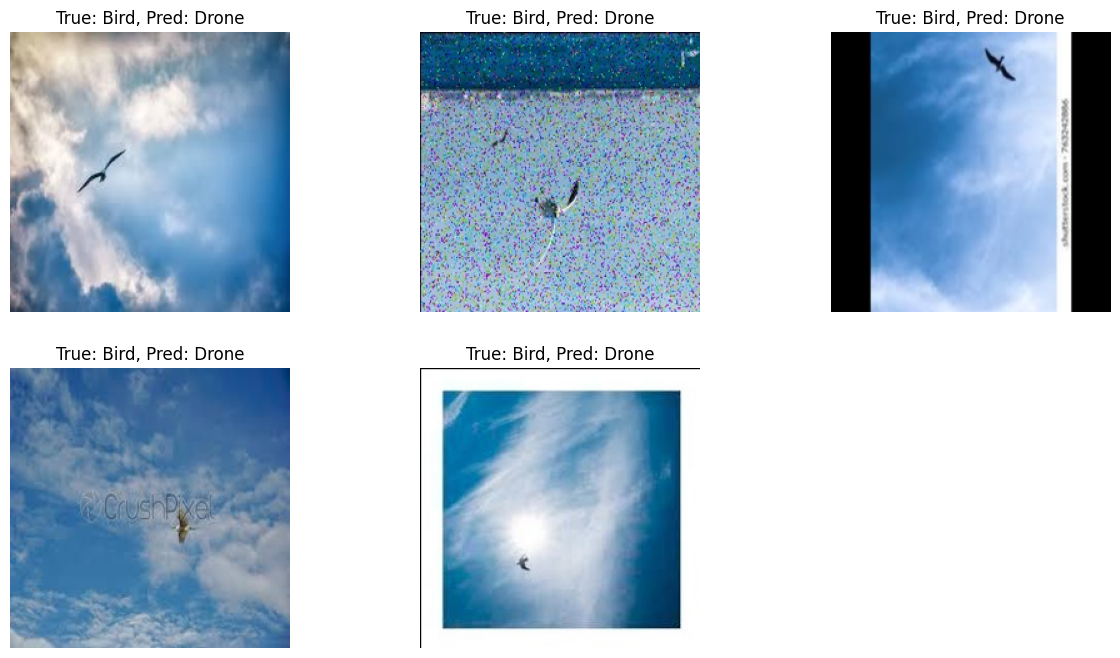

In [20]:
image_paths = test_data.filepaths  # Get file paths from test_data


results_df = pd.DataFrame({ # create new dataframe
    "image_path": image_paths,
    "true_label": true_labels_ann,
    "pred_label": predicted_labels_ann
})

# miss_classified rows
misscalssified_rows = results_df[results_df["true_label"] != results_df["pred_label"]]

plt.figure(figsize=(15, 8))
target_names = ["Bird", "Drone"]

for counter, (i, row) in enumerate(misscalssified_rows.iloc[:5].iterrows(), 1):
    image_path = row['image_path']
    true_label = target_names[row['true_label']]
    pred_label = target_names[row['pred_label']]

    with Image.open(image_path) as img:
        img = img.resize((224, 224))
        img_tensor = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        img_tensor = tf.convert_to_tensor(img_tensor)

    plt.subplot(2, 3, counter)
    plt.imshow(img_tensor)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')


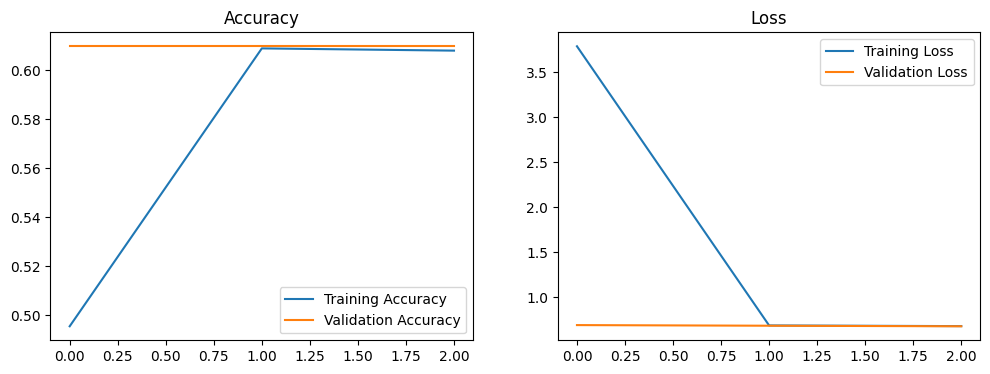

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ann_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(ann_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ann_model_history.history['loss'], label='Training Loss')
plt.plot(ann_model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [22]:
# CNN
cnn_model = models.Sequential([
    #CNN layers
    layers.Conv2D(filters=10, activation='relu', kernel_size=(3,3)), #Detects features in the image
    layers.MaxPooling2D(), #Reduces the size of the image
    #Dense layers
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


cnn_model.compile(optimizer='adam', #adam is a popular optimizer, because of good accuracy and speed
              loss='binary_crossentropy',
              metrics=['accuracy'])
del time
import time
start_cnn = time.time()
cnn_model_history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
    ]
)
end_cnn = time.time()
training_time_cnn =  end_cnn - start_cnn
trainable_params_cnn = np.sum([np.prod(v.shape) for v in cnn_model.trainable_weights])

Epoch 1/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 85s 819ms/step - accuracy: 0.6570 - loss: 1.4824 - val_accuracy: 0.8756 - val_loss: 0.3654
Epoch 2/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 80s 781ms/step - accuracy: 0.8071 - loss: 0.4363 - val_accuracy: 0.8122 - val_loss: 0.3720
Epoch 3/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 795ms/step - accuracy: 0.8235 - loss: 0.4060 - val_accuracy: 0.8195 - val_loss: 0.3819
Epoch 4/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 83s 802ms/step - accuracy: 0.8184 - loss: 0.3970 - val_accuracy: 0.8415 - val_loss: 0.3525
Epoch 5/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 83s 806ms/step - accuracy: 0.8411 - loss: 0.3843 - val_accuracy: 0.8512 - val_loss: 0.3175
Epoch 6/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 80s 777ms/step - accuracy: 0.8612 - loss: 0.3395 - val_accuracy: 0.8805 - val_loss: 0.2789
Epoch 7/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 83s 806ms/step - accuracy: 0.8388 - loss: 0.3623 - val_accuracy: 0.8439 - val_loss: 0.3281
Epoch 8/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 84s 818ms/step - accuracy: 0.8515 - loss: 0

In [23]:
cnn_model.evaluate(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.8555 - loss: 0.3390


[0.3555299639701843, 0.8613138794898987]

In [24]:
# Predict on the test set
predictions_cnn = cnn_model.predict(test_data)
predicted_labels_cnn = (predictions_cnn > 0.5).astype("int32").flatten()

# Get true labels (already in .labels as NumPy array)
true_labels_cnn = np.array(test_data.labels).astype("int32")

# Print classification report
print(classification_report(true_labels_cnn, predicted_labels_cnn, target_names=["Bird", "Drone"]))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels_cnn, predicted_labels_cnn))

# Print model parameters: 
print("--"*40)
print("\n Training parameters:")
print(f"\nTraining Time: {training_time_cnn:.2f}s")
print(f"Trainable Parameters: {trainable_params_cnn:,}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step
              precision    recall  f1-score   support

        Bird       0.83      0.81      0.82       161
       Drone       0.88      0.89      0.89       250

    accuracy                           0.86       411
   macro avg       0.86      0.85      0.85       411
weighted avg       0.86      0.86      0.86       411


Confusion Matrix:
[[131  30]
 [ 27 223]]
--------------------------------------------------------------------------------

 Training parameters:

Training Time: 998.46s
Trainable Parameters: 2,464,521


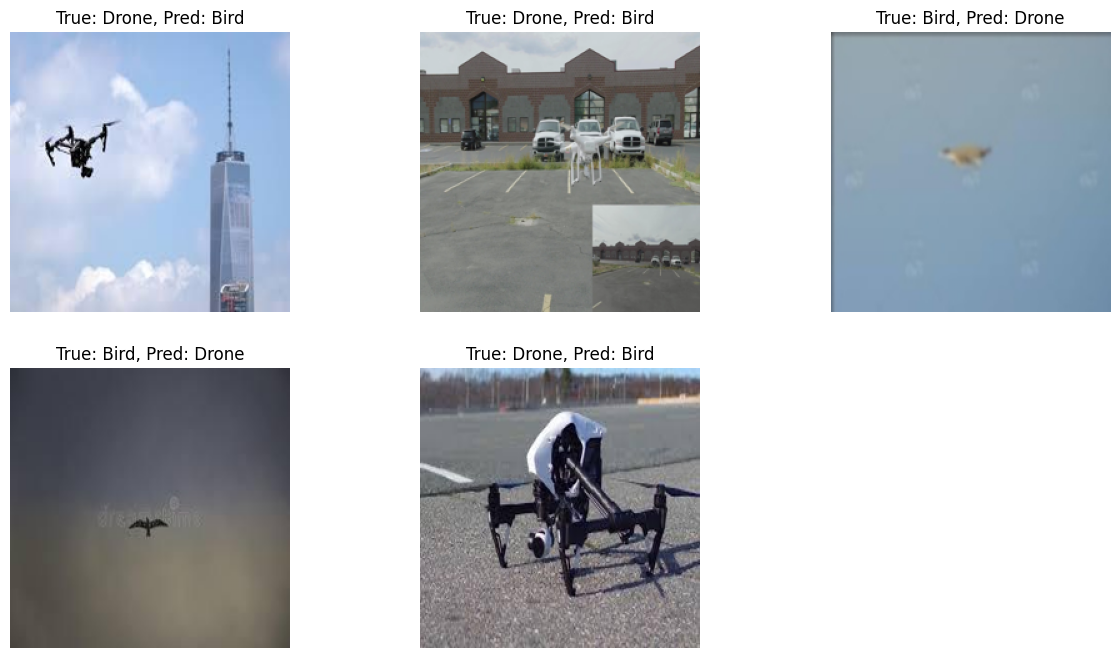

In [25]:
del results_df # reseting the dataframe

image_paths = test_data.filepaths  # Get file paths from test_data


results_df = pd.DataFrame({ # create new dataframe
    "image_path": image_paths,
    "true_label": true_labels_cnn,
    "pred_label": predicted_labels_cnn
})

# miss_classified rows
misscalssified_rows = results_df[results_df["true_label"] != results_df["pred_label"]]

plt.figure(figsize=(15, 8))
target_names = ["Bird", "Drone"]

for counter, (i, row) in enumerate(misscalssified_rows.iloc[:5].iterrows(), 1):
    image_path = row['image_path']
    true_label = target_names[row['true_label']]
    pred_label = target_names[row['pred_label']]

    with Image.open(image_path) as img:
        img = img.resize((224, 224))
        img_tensor = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        img_tensor = tf.convert_to_tensor(img_tensor)

    plt.subplot(2, 3, counter)
    plt.imshow(img_tensor)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')


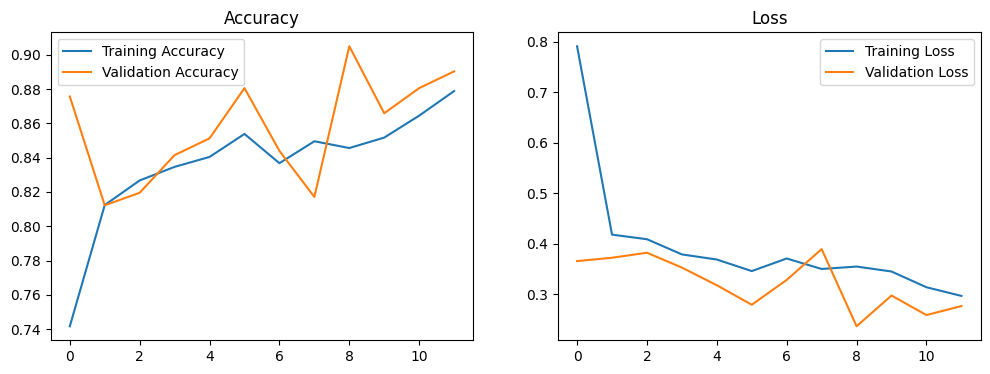

In [26]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(cnn_model_history.history['loss'], label='Training Loss')
plt.plot(cnn_model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Optimizing CNN - Base model


In [27]:
# CNN with data Augmentation:
cnn_model_aug = models.Sequential([
    #CNN layers
    data_augmentation,
    layers.Conv2D(filters=10, activation='relu', kernel_size=(3,3)), #Detects features in the image
    layers.MaxPooling2D(), #Reduces the size of the image
    #Dense layers
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


cnn_model_aug.compile(optimizer='adam', #adam is a popular optimizer, because of good accuracy and speed
              loss='binary_crossentropy',
              metrics=['accuracy'])
del time
import time
start_cnn_aug = time.time()
cnn_model_aug_history = cnn_model_aug.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
    ]
)

end_cnn_aug = time.time()
training_time_cnn_aug = end_cnn_aug - start_cnn_aug
trainable_params_cnn_aug = np.sum([np.prod(v.shape) for v in cnn_model_aug.trainable_weights])



Epoch 1/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 86s 816ms/step - accuracy: 0.5710 - loss: 1.7502 - val_accuracy: 0.6098 - val_loss: 0.6884
Epoch 2/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 83s 800ms/step - accuracy: 0.6146 - loss: 0.6866 - val_accuracy: 0.6098 - val_loss: 0.6831
Epoch 3/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 794ms/step - accuracy: 0.6108 - loss: 0.6819 - val_accuracy: 0.6098 - val_loss: 0.6790
Epoch 4/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 83s 801ms/step - accuracy: 0.6090 - loss: 0.6783 - val_accuracy: 0.6098 - val_loss: 0.6759
Epoch 5/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 84s 819ms/step - accuracy: 0.6012 - loss: 0.6770 - val_accuracy: 0.6098 - val_loss: 0.6736
Epoch 6/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 798ms/step - accuracy: 0.6043 - loss: 0.6745 - val_accuracy: 0.6098 - val_loss: 0.6720
Epoch 7/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 79s 768ms/step - accuracy: 0.6091 - loss: 0.6719 - val_accuracy: 0.6098 - val_loss: 0.6709
Epoch 8/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 77s 752ms/step - accuracy: 0.6087 - loss: 0

In [28]:
cnn_model_aug.evaluate(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 328ms/step - accuracy: 0.6328 - loss: 0.6591


[0.6695368885993958, 0.6082724928855896]

In [29]:
# Predict on the test set
predictions_cnn_aug = cnn_model_aug.predict(test_data)
predicted_labels_cnn_aug = (predictions_cnn_aug > 0.5).astype("int32").flatten()

# Get true labels (already in .labels as NumPy array)
true_labels_cnn_aug = np.array(test_data.labels).astype("int32")

# Print classification report
print(classification_report(true_labels_cnn_aug, predicted_labels_cnn_aug, target_names=["Bird", "Drone"]))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels_cnn_aug, predicted_labels_cnn_aug))

# Print model parameters: 
print("--"*40)
print("\n Training parameters:")
print(f"\nTraining Time: {training_time_cnn_aug:.2f}s")
print(f"Trainable Parameters: {trainable_params_cnn_aug:,}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step
              precision    recall  f1-score   support

        Bird       0.00      0.00      0.00       161
       Drone       0.61      1.00      0.76       250

    accuracy                           0.61       411
   macro avg       0.30      0.50      0.38       411
weighted avg       0.37      0.61      0.46       411


Confusion Matrix:
[[  0 161]
 [  0 250]]
--------------------------------------------------------------------------------

 Training parameters:

Training Time: 1211.41s
Trainable Parameters: 2,464,521


/home/ucloud/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ucloud/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ucloud/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


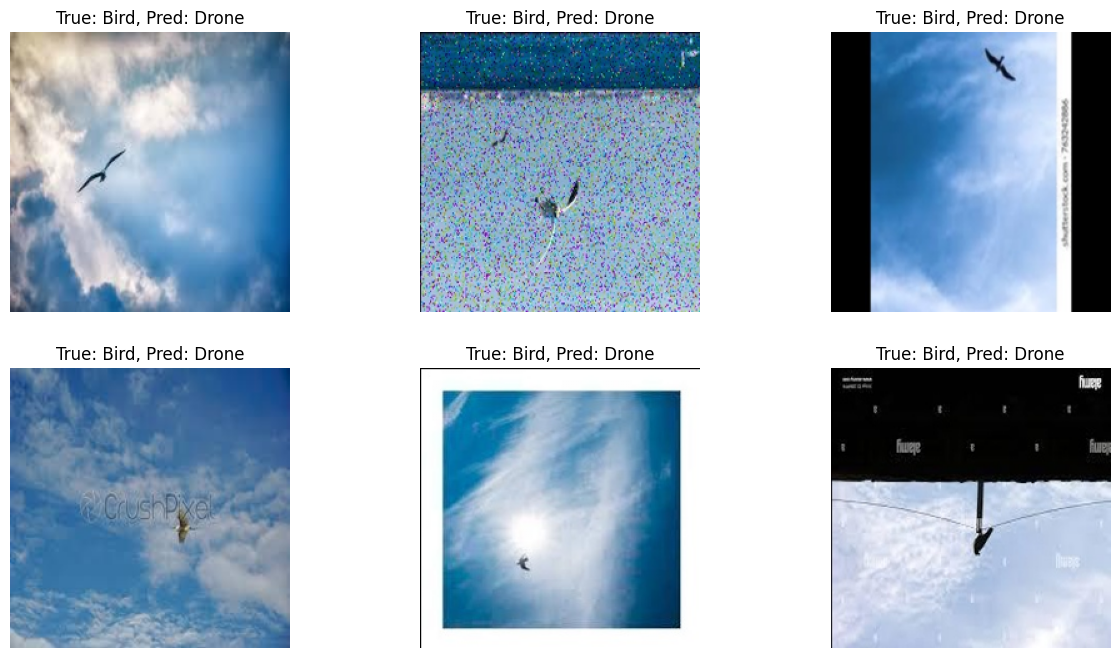

In [30]:
del results_df # reseting the dataframe

image_paths = test_data.filepaths  # Get file paths from test_data


results_df = pd.DataFrame({ # create new dataframe
    "image_path": image_paths,
    "true_label": true_labels_cnn_aug,
    "pred_label": predicted_labels_cnn_aug
})

# miss_classified rows
misscalssified_rows = results_df[results_df["true_label"] != results_df["pred_label"]]

plt.figure(figsize=(15, 8))
target_names = ["Bird", "Drone"]

for counter, (i, row) in enumerate(misscalssified_rows.iloc[:6].iterrows(), 1):
    image_path = row['image_path']
    true_label = target_names[row['true_label']]
    pred_label = target_names[row['pred_label']]

    with Image.open(image_path) as img:
        img = img.resize((224, 224))
        img_tensor = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        img_tensor = tf.convert_to_tensor(img_tensor)

    plt.subplot(2, 3, counter)
    plt.imshow(img_tensor)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')


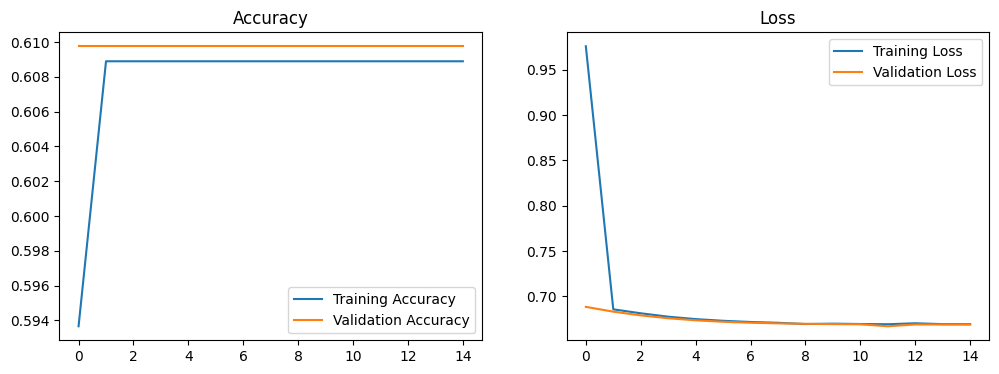

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_model_aug_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_aug_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(cnn_model_aug_history.history['loss'], label='Training Loss')
plt.plot(cnn_model_aug_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [32]:
# CNN with additional layers:
cnn_model_optimized_layers = models.Sequential([
    #CNN layers
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3)), #Detects features in the image
    layers.MaxPooling2D(), #Reduces the size of the image
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)), #we can add more layers to detect more features
    layers.MaxPooling2D(),

    layers.Conv2D(filters=128, activation='relu', kernel_size=(3,3)), #we can add more layers to detect more features
    layers.MaxPooling2D(),
    #Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3), # reduces the posiblity of overfitting.
    layers.Dense(1, activation='sigmoid')
])


cnn_model_optimized_layers.compile(optimizer='adam', #adam is a popular optimizer, because of good accuracy and speed
              loss='binary_crossentropy',
              metrics=['accuracy'])
del time
import time
start_cnn_opp = time.time()
cnn_model_optimized_layers_history = cnn_model_optimized_layers.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
    ]
)
end_cnn_opp = time.time()

# saturation meet at 5 epochs
trainable_params_cnn_optimized = np.sum([np.prod(v.shape) for v in cnn_model_optimized_layers.trainable_weights])
training_time_cnn_optimized = end_cnn_opp - start_cnn_opp

Epoch 1/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 90s 856ms/step - accuracy: 0.7224 - loss: 0.6742 - val_accuracy: 0.8122 - val_loss: 0.4366
Epoch 2/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 88s 849ms/step - accuracy: 0.8042 - loss: 0.4633 - val_accuracy: 0.8976 - val_loss: 0.2639
Epoch 3/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 84s 815ms/step - accuracy: 0.8456 - loss: 0.3836 - val_accuracy: 0.8707 - val_loss: 0.2854
Epoch 4/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 85s 823ms/step - accuracy: 0.8685 - loss: 0.3188 - val_accuracy: 0.8976 - val_loss: 0.2554
Epoch 5/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 84s 815ms/step - accuracy: 0.8656 - loss: 0.3010 - val_accuracy: 0.8707 - val_loss: 0.2706
Epoch 6/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 83s 800ms/step - accuracy: 0.8807 - loss: 0.2646 - val_accuracy: 0.9098 - val_loss: 0.2191
Epoch 7/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 83s 799ms/step - accuracy: 0.8880 - loss: 0.2603 - val_accuracy: 0.9122 - val_loss: 0.2163
Epoch 8/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 794ms/step - accuracy: 0.8970 - loss: 0

In [33]:
cnn_model_optimized_layers.evaluate(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - accuracy: 0.9263 - loss: 0.2202


[0.27025362849235535, 0.9197080135345459]

In [34]:
# Predict on the test set
predictions_cnn_optimized_layers = cnn_model_optimized_layers.predict(test_data)
predicted_labels_cnn_optimized_layers = (predictions_cnn_optimized_layers > 0.5).astype("int32").flatten()

# Get true labels (already in .labels as NumPy array)
true_labels_cnn_optimized_layers = np.array(test_data.labels).astype("int32")

# Print classification report
print(classification_report(true_labels_cnn_optimized_layers, predicted_labels_cnn_optimized_layers, target_names=["Bird", "Drone"]))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels_cnn_optimized_layers, predicted_labels_cnn_optimized_layers))

# Print model parameters: 
print("--"*40)
print("\n Training parameters:")
print(f"\nTraining Time: {training_time_cnn_optimized:.2f}s")
print(f"Trainable Parameters: {trainable_params_cnn_optimized:,}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step
              precision    recall  f1-score   support

        Bird       0.96      0.83      0.89       161
       Drone       0.90      0.98      0.94       250

    accuracy                           0.92       411
   macro avg       0.93      0.90      0.91       411
weighted avg       0.92      0.92      0.92       411


Confusion Matrix:
[[134  27]
 [  6 244]]
--------------------------------------------------------------------------------

 Training parameters:

Training Time: 1357.35s
Trainable Parameters: 5,631,169


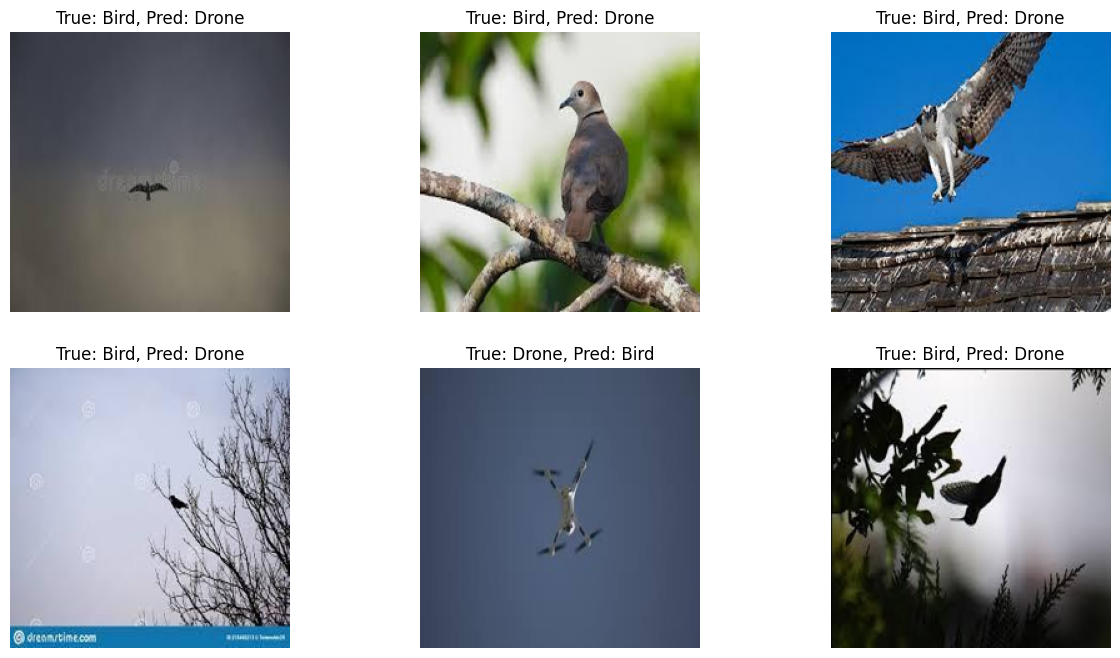

In [35]:
del results_df # reseting the dataframe

image_paths = test_data.filepaths  # Get file paths from test_data


results_df = pd.DataFrame({ # create new dataframe
    "image_path": image_paths,
    "true_label": true_labels_cnn_optimized_layers,
    "pred_label": predicted_labels_cnn_optimized_layers
})

# miss_classified rows
misscalssified_rows = results_df[results_df["true_label"] != results_df["pred_label"]]

plt.figure(figsize=(15, 8))
target_names = ["Bird", "Drone"]

for counter, (i, row) in enumerate(misscalssified_rows.iloc[:6].iterrows(), 1):
    image_path = row['image_path']
    true_label = target_names[row['true_label']]
    pred_label = target_names[row['pred_label']]

    with Image.open(image_path) as img:
        img = img.resize((224, 224))
        img_tensor = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        img_tensor = tf.convert_to_tensor(img_tensor)

    plt.subplot(2, 3, counter)
    plt.imshow(img_tensor)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')


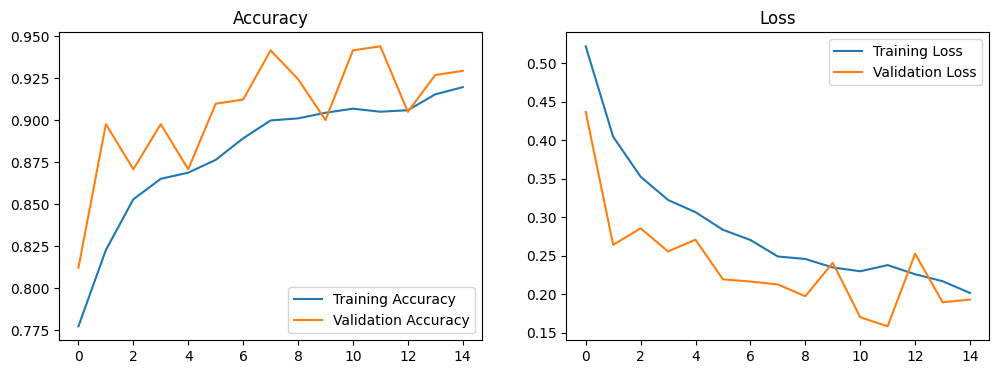

In [36]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_model_optimized_layers_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_optimized_layers_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(cnn_model_optimized_layers_history.history['loss'], label='Training Loss')
plt.plot(cnn_model_optimized_layers_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [37]:
# CNN with additional layers + Aug:
cnn_model_optimized_layers_aug = models.Sequential([
    #CNN layers
    data_augmentation,
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3)), #Detects features in the image
    layers.MaxPooling2D(), #Reduces the size of the image
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)), #we can add more layers to detect more features
    layers.MaxPooling2D(),

    layers.Conv2D(filters=128, activation='relu', kernel_size=(3,3)), #we can add more layers to detect more features
    layers.MaxPooling2D(),
    #Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3), # reduces the posiblity of overfitting.
    layers.Dense(1, activation='sigmoid')
])


cnn_model_optimized_layers_aug.compile(optimizer='adam', #adam is a popular optimizer, because of good accuracy and speed
              loss='binary_crossentropy',
              metrics=['accuracy'])
del time
import time
start_cnn_opp_aug = time.time()
cnn_model_optimized_layers_aug_history = cnn_model_optimized_layers_aug.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
    ]
)
end_cnn_opp_aug = time.time()

# saturation meet at 5 epochs
trainable_params_cnn_optimized_aug = np.sum([np.prod(v.shape) for v in cnn_model_optimized_layers_aug.trainable_weights])
training_time_cnn_optimized_aug = end_cnn_opp_aug - start_cnn_opp_aug

Epoch 1/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.6674 - loss: 0.7105 - val_accuracy: 0.7976 - val_loss: 0.4274
Epoch 2/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.8123 - loss: 0.4284 - val_accuracy: 0.8488 - val_loss: 0.3704
Epoch 3/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.8255 - loss: 0.3904 - val_accuracy: 0.8537 - val_loss: 0.3742
Epoch 4/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8417 - loss: 0.3680 - val_accuracy: 0.8366 - val_loss: 0.4076
Epoch 5/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 102s 989ms/step - accuracy: 0.8486 - loss: 0.3437 - val_accuracy: 0.8512 - val_loss: 0.5555


In [38]:
cnn_model_optimized_layers_aug.evaluate(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 405ms/step - accuracy: 0.8382 - loss: 0.4020


[0.4708392024040222, 0.8467153310775757]

In [39]:
# Predict on the test set
predictions_cnn_optimized_layers_aug = cnn_model_optimized_layers_aug.predict(test_data)
predicted_labels_cnn_optimized_layers_aug = (predictions_cnn_optimized_layers_aug > 0.5).astype("int32").flatten()

# Get true labels (already in .labels as NumPy array)
true_labels_cnn_optimized_layers_aug = np.array(test_data.labels).astype("int32")

# Print classification report
print(classification_report(true_labels_cnn_optimized_layers_aug, predicted_labels_cnn_optimized_layers_aug, target_names=["Bird", "Drone"]))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels_cnn_optimized_layers_aug, predicted_labels_cnn_optimized_layers_aug))

# Print model parameters: 
print("--"*40)
print("\n Training parameters:")
#print(f"\nTraining Time: {cnn_model_optimized_layers_aug:.2f}s")
print(f"Trainable Parameters: {trainable_params_cnn_optimized_aug:,}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step
              precision    recall  f1-score   support

        Bird       0.76      0.88      0.82       161
       Drone       0.92      0.82      0.87       250

    accuracy                           0.85       411
   macro avg       0.84      0.85      0.84       411
weighted avg       0.86      0.85      0.85       411


Confusion Matrix:
[[142  19]
 [ 44 206]]
--------------------------------------------------------------------------------

 Training parameters:
Trainable Parameters: 5,631,169


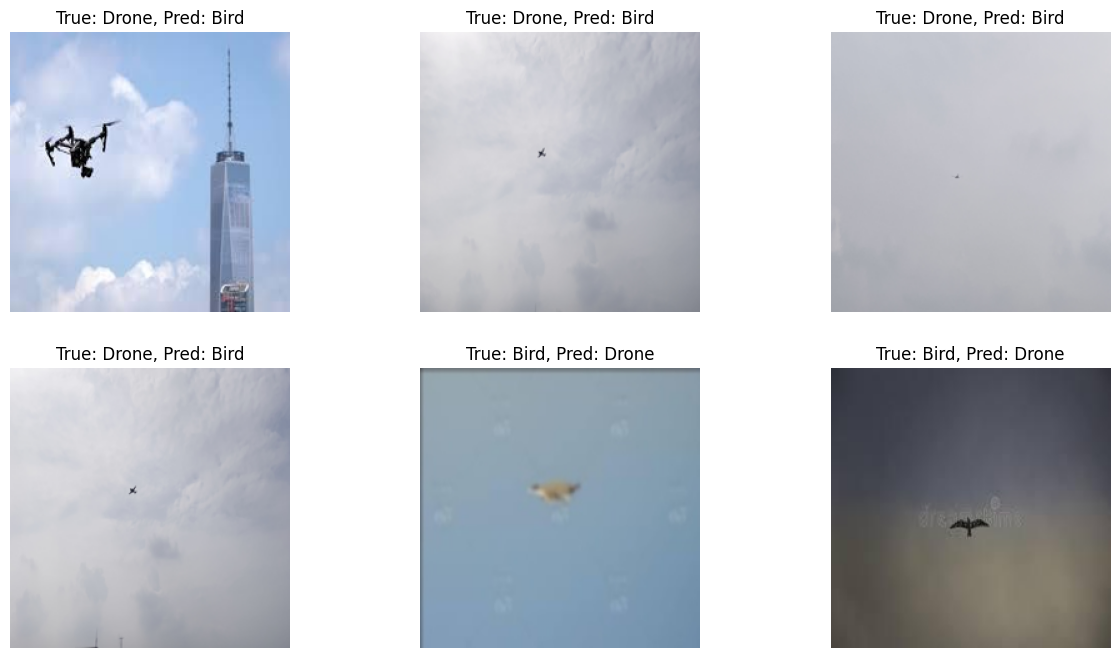

In [40]:
del results_df # reseting the dataframe

image_paths = test_data.filepaths  # Get file paths from test_data


results_df = pd.DataFrame({ # create new dataframe
    "image_path": image_paths,
    "true_label": true_labels_cnn_optimized_layers_aug,
    "pred_label": predicted_labels_cnn_optimized_layers_aug
})

# miss_classified rows
misscalssified_rows = results_df[results_df["true_label"] != results_df["pred_label"]]

plt.figure(figsize=(15, 8))
target_names = ["Bird", "Drone"]

for counter, (i, row) in enumerate(misscalssified_rows.iloc[:6].iterrows(), 1):
    image_path = row['image_path']
    true_label = target_names[row['true_label']]
    pred_label = target_names[row['pred_label']]

    with Image.open(image_path) as img:
        img = img.resize((224, 224))
        img_tensor = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        img_tensor = tf.convert_to_tensor(img_tensor)

    plt.subplot(2, 3, counter)
    plt.imshow(img_tensor)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')


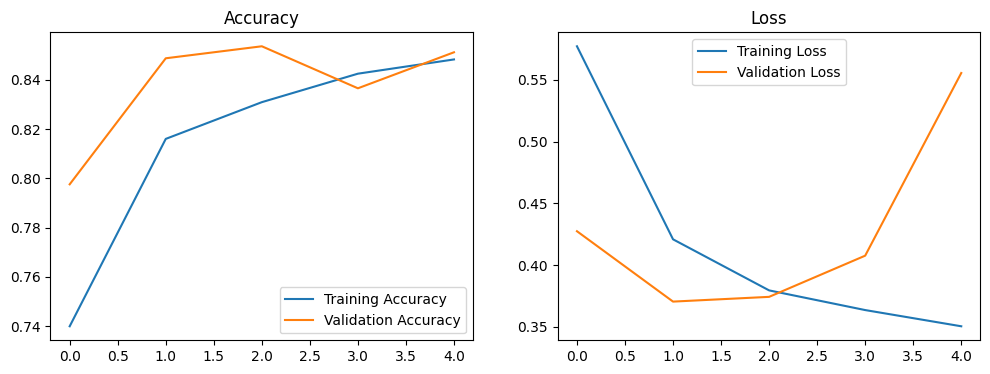

In [41]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_model_optimized_layers_aug_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_optimized_layers_aug_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(cnn_model_optimized_layers_aug_history.history['loss'], label='Training Loss')
plt.plot(cnn_model_optimized_layers_aug_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Adding noise

In [42]:
class AddGaussianNoise(tf.keras.layers.Layer):
    def __init__(self, stddev):
        super().__init__()
        self.stddev = stddev

    def call(self, inputs, training=False):
        if training:
            return inputs + tf.random.normal(shape=tf.shape(inputs), mean=0.0, stddev=self.stddev)
        return inputs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09427288..1.2209681].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.28600883..1.4195368].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17211214..1.5107409].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0138551..1.2009926].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3995805..1.2391242].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.29671043..1.4283154].


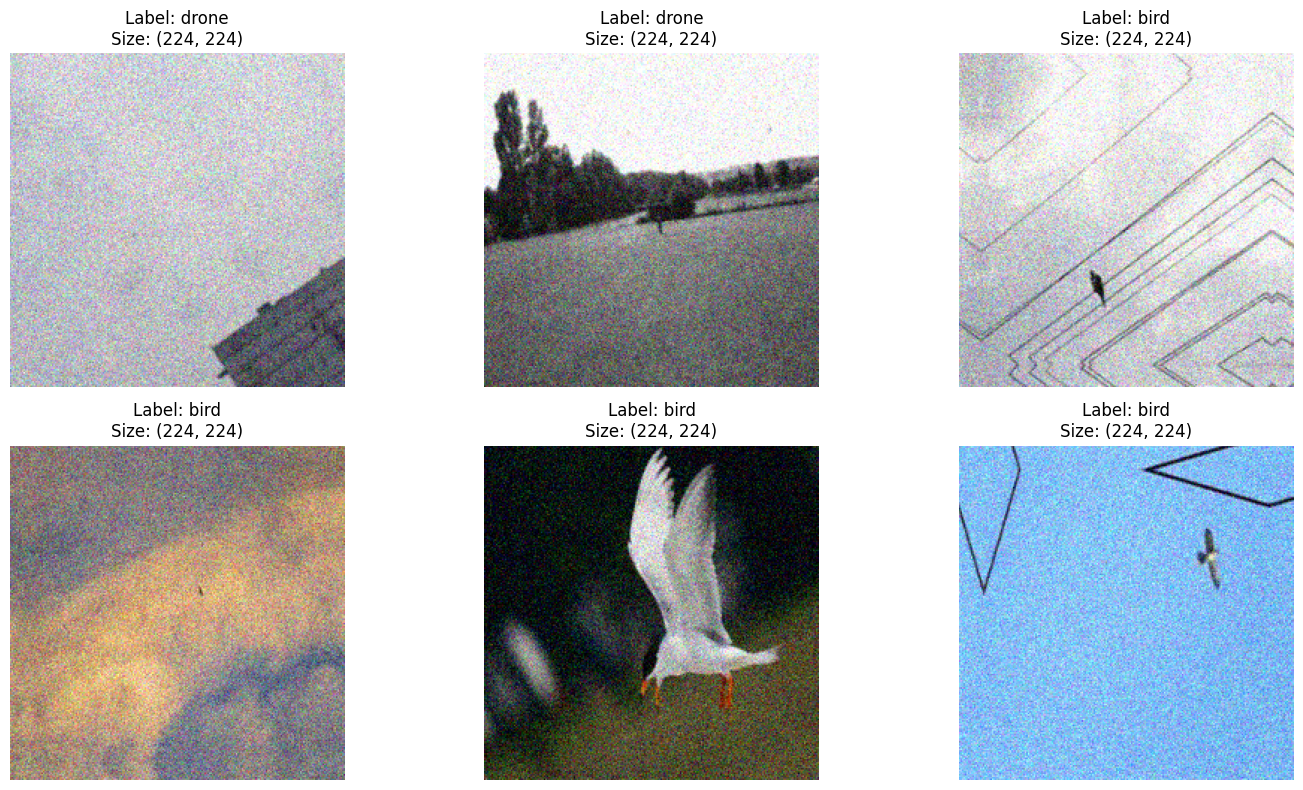

In [43]:
#We plot the images with noise

# Instantiate the noise layer
noise_layer = AddGaussianNoise(0.1)

# Pick 6 random rows
sample_rows = data.sample(6)


# Set up the plot
plt.figure(figsize=(15, 8))

for i, (idx, row) in enumerate(sample_rows.iterrows()):
    img_path = row['image_path']
    label = row['label']

    # Open the image and convert it to a TensorFlow tensor
    with Image.open(img_path) as img:
        img = img.resize((224, 224))  # Resize the image to match the model input size
        img_tensor = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize to 0-1
        img_tensor = tf.convert_to_tensor(img_tensor)  # Convert to TensorFlow tensor
        img_tensor = tf.expand_dims(img_tensor, axis=0)  # Add batch dim

    #Apply data augmentation
    img_tensor = data_augmentation(img_tensor)

    # Apply Gaussian noise
    noisy_image = noise_layer(img_tensor, training=True)
    noisy_image = tf.squeeze(noisy_image, axis=0)  # Remove batch dim for plotting

    # Plot the noisy image
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    plt.imshow(noisy_image)  # TensorFlow tensors can be directly visualized by Matplotlib
    plt.title(f"Label: {label}\nSize: {img.size}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [44]:
# CNN - Noised
cnn_model_noised = models.Sequential([
    #CNN layers
    data_augmentation,
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3)), #Detects features in the image
    layers.MaxPooling2D(), #Reduces the size of the image
    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)), 
    layers.MaxPooling2D(),

    layers.Conv2D(filters=128, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D(),
    AddGaussianNoise(0.1), # noise is inserted prior to faltten. most efficent way to test how well it performance

    #Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3), # reduces the posiblity of overfitting.
    layers.Dense(1, activation='sigmoid')
])

cnn_model_noised.compile(optimizer='adam', #adam is a popular optimizer, because of good accuracy and speed
              loss='binary_crossentropy',
              metrics=['accuracy'])
del time
import time
start_cnn_noise = time.time()
cnn_model_noised_history = cnn_model_noised.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
    ]
)
end_cnn_noise = time.time()
training_time_cnn_noised = end_cnn_noise - start_cnn_noise
trainable_params_cnn_noised = np.sum([np.prod(v.shape) for v in cnn_model_noised.trainable_weights])


Epoch 1/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 104s 987ms/step - accuracy: 0.6258 - loss: 0.8552 - val_accuracy: 0.7610 - val_loss: 0.5598
Epoch 2/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.7642 - loss: 0.5062 - val_accuracy: 0.8488 - val_loss: 0.3563
Epoch 3/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 102s 991ms/step - accuracy: 0.8200 - loss: 0.4118 - val_accuracy: 0.8707 - val_loss: 0.2960
Epoch 4/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 99s 963ms/step - accuracy: 0.8249 - loss: 0.3848 - val_accuracy: 0.8415 - val_loss: 0.3971
Epoch 5/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 100s 966ms/step - accuracy: 0.8457 - loss: 0.3529 - val_accuracy: 0.8732 - val_loss: 0.2682
Epoch 6/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 102s 987ms/step - accuracy: 0.8633 - loss: 0.3132 - val_accuracy: 0.8780 - val_loss: 0.2513
Epoch 7/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 98s 946ms/step - accuracy: 0.8837 - loss: 0.2832 - val_accuracy: 0.9122 - val_loss: 0.2534
Epoch 8/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8688 - loss: 0

In [45]:
cnn_model_noised.evaluate(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 538ms/step - accuracy: 0.9008 - loss: 0.2617


[0.2807001769542694, 0.9051094651222229]

In [46]:
# Predict on the test set
predictions_cnn_noise = cnn_model_noised.predict(test_data)
predicted_labels_cnn_noise = (predictions_cnn_noise > 0.5).astype("int32").flatten()

# Get true labels (already in .labels as NumPy array)
true_labels_cnn_noise = np.array(test_data.labels).astype("int32")

# Print classification report
print(classification_report(true_labels_cnn_noise, predicted_labels_cnn_noise, target_names=["Bird", "Drone"]))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_labels_cnn_noise, predicted_labels_cnn_noise))

# Print model parameters: 
print("--"*40)
print("\n Training parameters:")
print(f"\nTraining Time: {training_time_cnn_noised:.2f}s")
print(f"Trainable Parameters: {trainable_params_cnn_noised:,}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step
              precision    recall  f1-score   support

        Bird       0.88      0.88      0.88       161
       Drone       0.92      0.92      0.92       250

    accuracy                           0.91       411
   macro avg       0.90      0.90      0.90       411
weighted avg       0.91      0.91      0.91       411


Confusion Matrix:
[[141  20]
 [ 19 231]]
--------------------------------------------------------------------------------

 Training parameters:

Training Time: 1403.20s
Trainable Parameters: 5,631,169


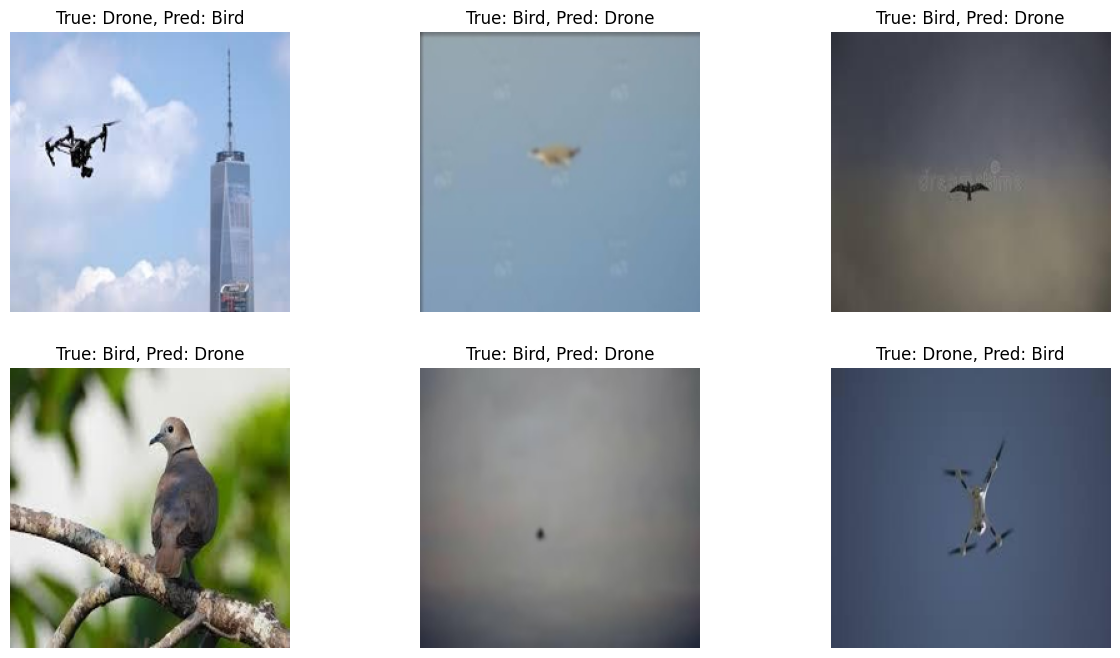

In [47]:
del results_df # reseting the dataframe

image_paths = test_data.filepaths  # Get file paths from test_data


results_df = pd.DataFrame({ # create new dataframe
    "image_path": image_paths,
    "true_label": true_labels_cnn_noise,
    "pred_label": predicted_labels_cnn_noise
})

# miss_classified rows
misscalssified_rows = results_df[results_df["true_label"] != results_df["pred_label"]]

plt.figure(figsize=(15, 8))
target_names = ["Bird", "Drone"]

for counter, (i, row) in enumerate(misscalssified_rows.iloc[:6].iterrows(), 1):
    image_path = row['image_path']
    true_label = target_names[row['true_label']]
    pred_label = target_names[row['pred_label']]

    with Image.open(image_path) as img:
        img = img.resize((224, 224))
        img_tensor = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        img_tensor = tf.convert_to_tensor(img_tensor)

    plt.subplot(2, 3, counter)
    plt.imshow(img_tensor)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')


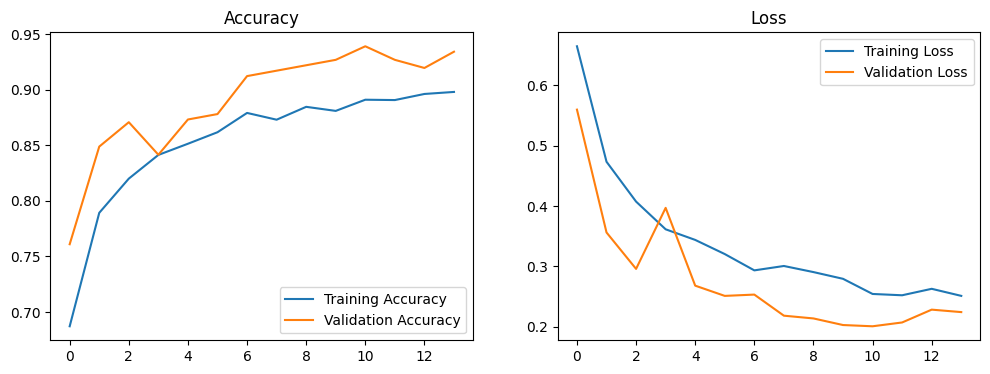

In [48]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_model_noised_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_noised_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(cnn_model_noised_history.history['loss'], label='Training Loss')
plt.plot(cnn_model_noised_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Overview of models

In [49]:

def evaluate_model(model, test_data, model_name, training_time, trainable_params):
    # Predict
    predictions = model.predict(test_data)
    predicted_labels = (predictions > 0.5).astype("int32").flatten()
    true_labels = np.array(test_data.labels).astype("int32")

    # Classification report
    report = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

    # Optional: Measure inference time
    sample_images = test_data[0][0]  # First batch
    import time
    start_inf = time.time()
    _ = model.predict(sample_images)
    end_inf = time.time()
    inference_time = (end_inf - start_inf) / len(sample_images)

    summary = {
        "Model": model_name,
        "Accuracy": f"{report['accuracy']:.4f}",
        "Precision": f"{report['1']['precision']:.4f}",
        "Recall": f"{report['1']['recall']:.4f}",
        "F1-Score": f"{report['1']['f1-score']:.4f}",
        "Training Time (s)": round(training_time, 2),
        "Inference Time (s/img)": round(inference_time, 4),
        "Trainable Parameters": trainable_params
    }

    return summary

In [50]:
results = []

results.append(evaluate_model(ann_model, test_data, "ANN", training_time_ann, trainable_params_ann))
results.append(evaluate_model(cnn_model, test_data, "CNN", training_time_cnn, trainable_params_cnn))
results.append(evaluate_model(cnn_model_aug, test_data, "CNN - Aug", training_time_cnn_aug, trainable_params_cnn_aug))
results.append(evaluate_model(cnn_model_optimized_layers, test_data, "CNN - Optimized", training_time_cnn_optimized, trainable_params_cnn_optimized))
results.append(evaluate_model(cnn_model_optimized_layers_aug, test_data, "CNN - Optimized + aug", training_time_cnn_optimized_aug, trainable_params_cnn_optimized_aug))
results.append(evaluate_model(cnn_model_noised, test_data, "CNN - Noise", training_time_cnn_noised, trainable_params_cnn_noised))


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [51]:
df_results = pd.DataFrame(results)
print(df_results)

                   Model Accuracy Precision  Recall F1-Score  \
0                    ANN   0.6083    0.6083  1.0000   0.7564   
1                    CNN   0.8613    0.8814  0.8920   0.8867   
2              CNN - Aug   0.6083    0.6083  1.0000   0.7564   
3        CNN - Optimized   0.9197    0.9004  0.9760   0.9367   
4  CNN - Optimized + aug   0.8467    0.9156  0.8240   0.8674   
5            CNN - Noise   0.9051    0.9203  0.9240   0.9222   

   Training Time (s)  Inference Time (s/img)  Trainable Parameters  
0             252.33                  0.0060               9034601  
1             998.46                  0.0061               2464521  
2            1211.41                  0.0064               2464521  
3            1357.35                  0.0076               5631169  
4             530.83                  0.0075               5631169  
5            1403.20                  0.0074               5631169  


In [52]:
def plot_confusion_matrices_grid(models, model_names, test_data, class_names=["Bird", "Drone"], n_cols=2):
    num_models = len(models)
    n_rows = int(np.ceil(num_models / n_cols))

    true_labels = np.array(test_data.labels).astype("int32")

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
    axes = axes.flatten()

    for i, (model, name) in enumerate(zip(models, model_names)):
        predictions = model.predict(test_data)
        predicted_labels = (predictions > 0.5).astype("int32").flatten()

        cm = confusion_matrix(true_labels, predicted_labels)

        sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=class_names, yticklabels=class_names, ax=axes[i])
        axes[i].set_title(f"({chr(97 + i)}) {name}")
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("True")

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [53]:
import seaborn as sns

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 414ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 421ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 414ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 467ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 425ms/step


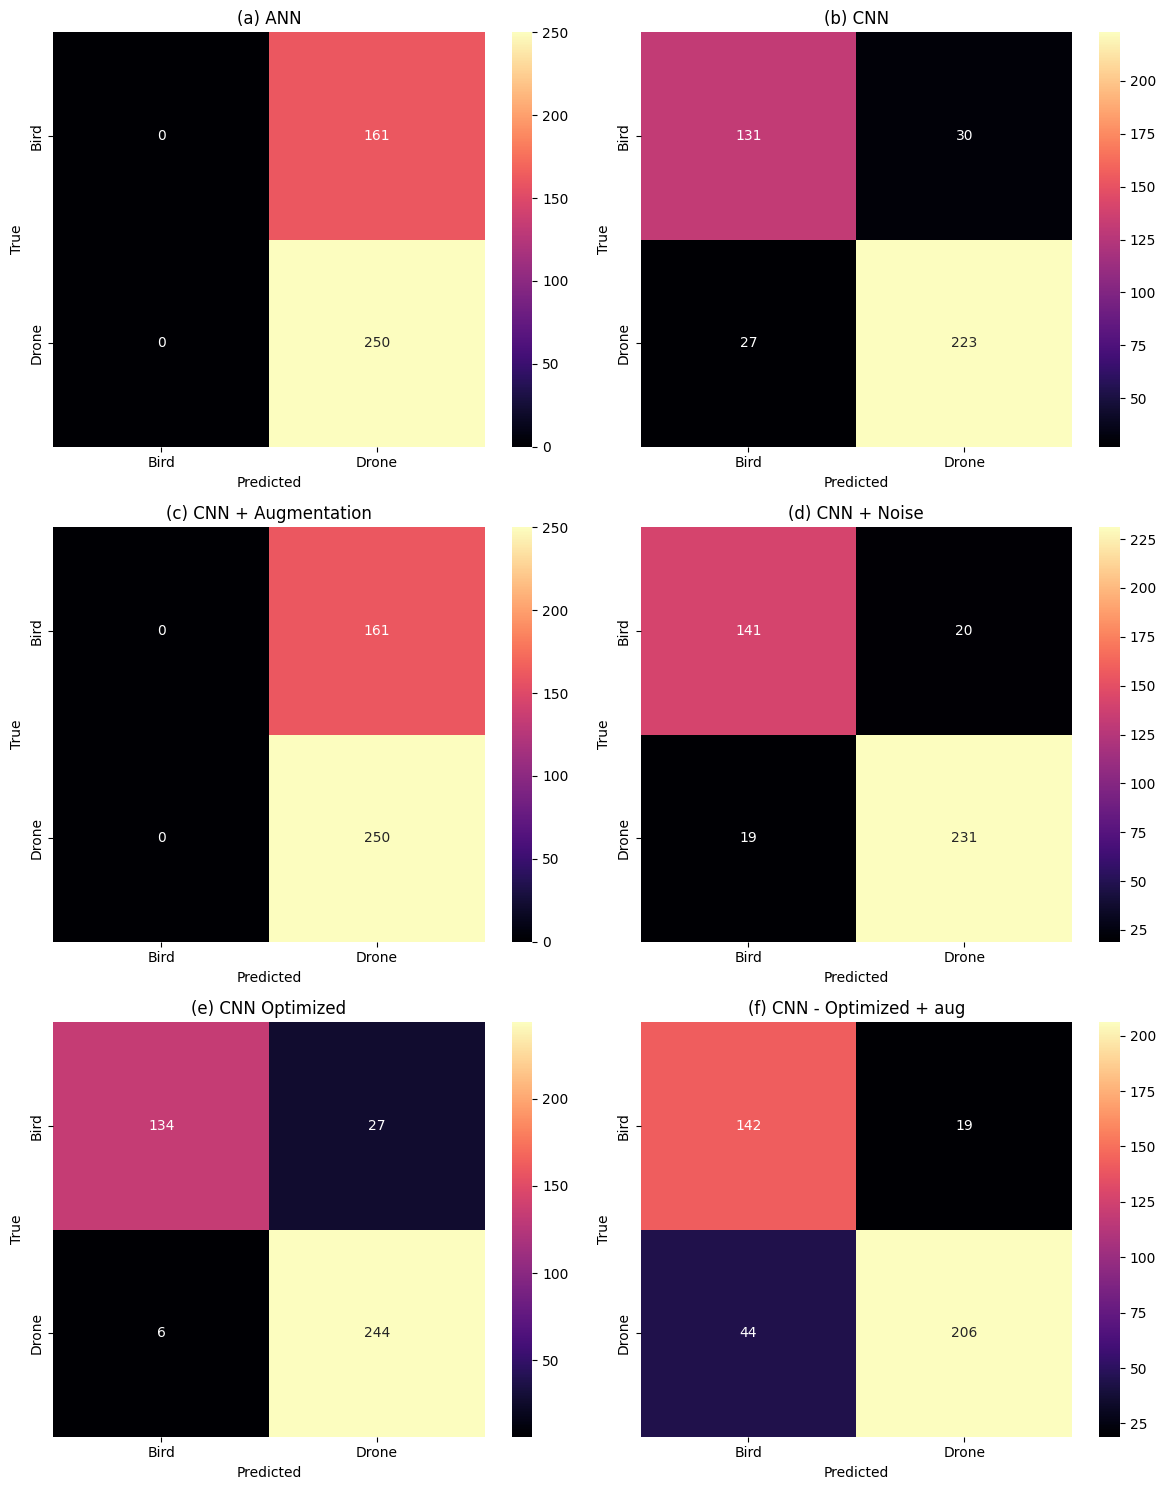

In [54]:
plot_confusion_matrices_grid(
    models=[ann_model, cnn_model, cnn_model_aug, cnn_model_noised, cnn_model_optimized_layers, cnn_model_optimized_layers_aug],
    model_names=["ANN", "CNN", "CNN + Augmentation", "CNN + Noise", "CNN Optimized", "CNN - Optimized + aug"],
    test_data=test_data
)